# TASK = implement the kinematic bicycle model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# our target is to compute the state[X,Y,theta, delta]
# sigma = steering angle
# theta = heading angle
# v = velocity
# w = turning rate
# r = radius traced by instantaneous center
# delta = steeing rate
# x_c,y_c = centre of gravity
# w = omega = steering angle rate
# inputs = [v,w]
#  inputs are the bicycle speed  𝑣  and steering angle rate  𝜔 .
#     The input can also directly be the steering angle  𝛿  rather than its rate in the simplified case. 



In [3]:
# The bicycle begins with zero initial conditions, has a maximum turning rate of 1.22 rad/s, a wheelbase length of 2m,
# and a length of 1.2m to its center of mass 
# from the rear axle.

# wheelbas is the distance between the centre of front and rear wheel i.e L = 2m
# length of 1.2m to its centre if mass means l_r = 1.2m
# turning rate 1.22 means w_max = 1.22 rad/s

In [4]:
# lets create a class
# class is a code template for creating objects

# the __init__ is a constructor in python. constructors are used to initialize the object's state
# the task of constructor is to initialize(or assign values) to the data members of the class when an object of class is created

In [5]:
# for an example-

class Person:
    
    def __init__(self, name):
        self.name = name
        
    def say_hi(self):
        print("Hello, my name is ",self.name)
        
p1 = Person('Seema')  #(calling class)
p2 = Person('sapna')
p3 = Person('dolly')
p1.say_hi()    #in class person calling a fuunction named say_hi
p2.say_hi()
p3.say_hi()

Hello, my name is  Seema
Hello, my name is  sapna
Hello, my name is  dolly


In [6]:
class Bicycle():
    
    def __init__(self):
        self.xc = 0
        self.yc = 0
        self.theta = 0
        self.beta = 0
        self.delta = 0
        
        self.L = 2
        self.lr = 1.2
        self.w_max = 1.22
        
        self.sample_time = 0.01        #sample time is set to 10 milli seconds,it is required 
                                       #for numerical integration when propagating the kinematics through time
        
    def reset(self):      # rest function will again set every value to 0
        self.xc = 0
        self.yc = 0
        self.theta = 0
        self.beta = 0
        self.delta = 0
        
        

In [7]:
from math import cos, sin, atan2 ,tan       #atan2 is uded to get tan inverse value in radian 

In [8]:
print(type(10e-3))
print(10e-3)
# print(10e - 3) this will show error

<class 'float'>
0.01


In [9]:
class Bicycle(Bicycle):
    
    def step (self, v, w):   # v is velocity & w is angular rate (i.e inputs)
        #we know w_max = 1.22, w(i.e, angular rate) is the vector that measures rotation rate, i.e how fast an object rotates
        #or revloves relative to another point,
        #so angular rate will be in range -1.22 to 1.22 (coz, directions)
        
        if w > 0:
            w = min(w, self.w_max)
        else:
            w = max(w,-self.w_max)
            
        #to update the values obviously time is required, so lets set the time
        time_sample = 10e-3     #i.e 10 milliseconds
        
        #now lets update the values , or we can say that,
        #to get final state[X,Y,theta, delta], we can use discrete time model:
        
        xc_dot = v* np.cos(self.theta + self.beta)
        yc_dot = v* np.sin(self.theta + self.beta)
        theta_dot = (v / self.L) * (np.cos(self.beta)) * (np.tan(self.delta)) 
        delta_dot = w
        
        self.beta = np.arctan(self.lr * (tan(self.delta)) / self.L)
        self.xc += xc_dot * time_sample      #i.e updating the value of xc, yc, theta and delta based on time
        self.yc += yc_dot * time_sample
        self.theta += theta_dot * time_sample
        self.delta += delta_dot * time_sample
        
        pass

# DESIRED PATH IS CIRCLE

In [10]:
# now we will the inputs and required path or trajectory to be followed by the vehicle

# lets suppose we want to run our vehicle in a circular path of radius say 20m, in time lets say  10 seconds

#  so what all the inputs we needed are:
#         steeing angle
#         thus, steering angle (delta) for circular path of radius 20m is:
#             delta = tan_inverse(L/R)
#             thus steering angle is 0.0996 rad
            
# and also steeing angle nedd to be changed or regulated according to speed 
# therefore, desired speed of the vehicle to move in the desired circular path is
# v = d/t
# so v = 4*pi


In [11]:
# We will now implement this in a loop to step through the model equations. 
# We will also run our bicycle model solution along with your model to show you the expected trajectory. 
# This will help you verify the correctness of your model.

In [12]:
# just to understand what our next cell code will do :)
# IF YOU WANT TO CHECK YOU CAN UNCOMMENT THE CELL CODE--------------:)

# sample_time = 0.01
# end_time = 0.2
# model = Bicycle()      #------------------i.e(bicycle(bicycle))
# arr = np.arange(0, end_time, sample_time)                   #np.array([[1, 2], [4, 5],[1,0]])
# print(arr)
# print('\n array size: \n',arr.shape)

# model.delta = np.arctan(2/10) 

# x_data = np.zeros_like(arr)
# y_data = np.zeros_like(arr)

# print("\n x_data:\n", x_data)
# print("\n y_data:\n", y_data)

# for i in range(arr.shape[0]):
#     x_data[i] = model.xc
#     y_data[i] = model.yc
#     model.step(np.pi, 0)
#     print("\n x_data[i]:\n", x_data[i])
#     print("\n y_data[i]:\n", y_data[i])
    

In [13]:
# the above results are as:
#     step1 -- x_data[i] = 0.0
#     step2 -- x_data[i] = model.xc
#                          |
#                          += xc_dot * time_sample
#                                |        |
#                                |       0.01.....................!
#                             v* np.cos(self.theta + self.beta) *0.01
#                            [ v = pi, self.theta = 0, self.beta = 0 (from 1st class bicycle) ]
#                            pi *cos(0+0) * 0.01
#                           = 0.03141
#                             this is our result
                            
#                             and continues to update as
#                             0.03141 + 0.03141 = 0.062..
#                             0.062.. + 0.03141 = 0.09423
#                             and so on
#                             similarly for y_data[i]
                            
#                             and these are updated because of the command
#                             model.step(np.pi, 0)    because pi is our velocity

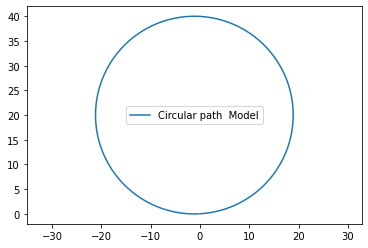

In [14]:
sample_time = 0.01
end_time = 10
radius = 20
L = 2
model = Bicycle()


model.delta = np.arctan(L/radius)     #arctan for tan inverse
time_data = np.arange(0, end_time, sample_time)     #Returns an array with evenly spaced elements as per the interval. 
                                                    #The interval mentioned is half-opened i.e. [Start, Stop, step) 
x_data = np.zeros_like(time_data)        #This numpy method returns an array of given shape and type as given array, with zeros.
y_data = np.zeros_like(time_data)
# x_solution = np.zeros_like(time_data)
# y_solution = np.zeros_like(time_data)


# print(x_solution)


for i in range(time_data.shape[0]):                  #.shape[0] gives rows array(ex if our shape is(5,4) it will give 5)
    x_data[i] = model.xc                              #assigning the values you can check by uncommenting the print statement
    y_data[i] = model.yc
    
    model.step(np.pi *4, 0)
    #print(x_data[i])
    #print(model.step(np.pi, 0))
    
plt.axis('equal')
plt.plot(x_data, y_data,label='Circular path  Model')
plt.legend()
plt.show()
    

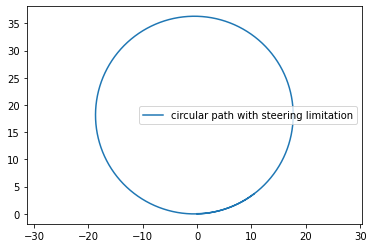

In [15]:
# ----------------------------------------------------------------2
sample_time = 0.01
time_end = 10
model.reset()
model = Bicycle()

t_data = np.arange(0, time_end, sample_time)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)



for i in range(t_data.shape[0]):
    x_data[i] = model.xc
    y_data[i] = model.yc
    if model.delta < np.arctan(L/radius):
        model.step(np.pi*4, model.w_max)      # to maintain uniformity
    else:
        model.step(np.pi*4, 0)

            
            
plt.axis('equal')
plt.plot(x_data, y_data, label='circular path with steering limitation')

plt.legend()
plt.show()

# DESIRED PATH IS SQUARE / RECTANGULAR PATH

In [26]:
x = np.array([ 0.031,  0.50, 0.41, 0.20, 0.40, 0.10])
x = x[:]
print('\n x:\n',x)
x[2:2+1] = 0.77
print('\n x:\n',x)
x[2+1:2+1*2] = 0.77
print('\n x:\n',x)
x[3:3+1*2] = 0.77
print('\n x:\n',x)


 x:
 [0.031 0.5   0.41  0.2   0.4   0.1  ]

 x:
 [0.031 0.5   0.77  0.2   0.4   0.1  ]

 x:
 [0.031 0.5   0.77  0.77  0.4   0.1  ]

 x:
 [0.031 0.5   0.77  0.77  0.77  0.1  ]



 t_data:
 (6000,)

 shape of w_data:
 (6000,)

 w_data:
 [0. 0. 0. ... 0. 0. 0.]

 w_data:
 [0. 0. 0. ... 0. 0. 0.]

 x_data[i]:
 0.0

 y_data[i]:
 0.0

 x_data[i]:
 0.04

 y_data[i]:
 0.0

 x_data[i]:
 0.08

 y_data[i]:
 0.0

 x_data[i]:
 0.12

 y_data[i]:
 0.0

 x_data[i]:
 0.16

 y_data[i]:
 0.0

 x_data[i]:
 0.2

 y_data[i]:
 0.0

 x_data[i]:
 0.24000000000000002

 y_data[i]:
 0.0

 x_data[i]:
 0.28

 y_data[i]:
 0.0

 x_data[i]:
 0.32

 y_data[i]:
 0.0

 x_data[i]:
 0.36

 y_data[i]:
 0.0

 x_data[i]:
 0.39999999999999997

 y_data[i]:
 0.0

 x_data[i]:
 0.43999999999999995

 y_data[i]:
 0.0

 x_data[i]:
 0.4799999999999999

 y_data[i]:
 0.0

 x_data[i]:
 0.5199999999999999

 y_data[i]:
 0.0

 x_data[i]:
 0.5599999999999999

 y_data[i]:
 0.0

 x_data[i]:
 0.6

 y_data[i]:
 0.0

 x_data[i]:
 0.64

 y_data[i]:
 0.0

 x_data[i]:
 0.68

 y_data[i]:
 0.0

 x_data[i]:
 0.7200000000000001

 y_data[i]:
 0.0

 x_data[i]:
 0.7600000000000001

 y_data[i]:
 0.0

 x_data[i]:
 0.800000000000000

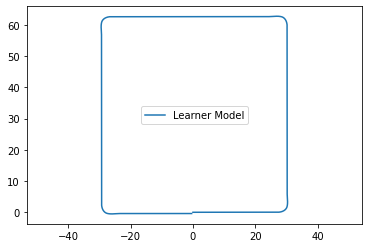

In [20]:
sample_time = 0.01
time_end = 60
model = Bicycle()
model.reset()

t_data = np.arange(0, time_end, sample_time)
print('\n t_data:\n',t_data.shape)
x_data = np.zeros_like(t_data)
y_data = np.zeros_like(t_data)

# maintain velocity at 4 m/s
v_data = np.zeros_like(t_data)
v_data[:] = 4
w_data = np.zeros_like(t_data)
print('\n shape of w_data:\n', w_data.shape)
print('\n w_data:\n',w_data)

# ==================================
# Square Path: set w at corners only
# ==================================
w_data[670:670 + 100] = 0.753
w_data[670 + 100:670 + 100 * 2] = -0.753
w_data[2210:2210 + 100] = 0.753
w_data[2210 + 100:2210 + 100 * 2] = -0.753
w_data[3670:3670 + 100] = 0.753
w_data[3670 + 100:3670 + 100 * 2] = -0.753
w_data[5220:5220 + 100] = 0.753
w_data[5220 + 100:5220 + 100 * 2] = -0.753

print('\n w_data:\n',w_data)

# ==================================
# Spiral Path: high positive w, then small negative w
# ==================================
# w_data[:] = -1/100
# w_data[0:100] = 1
# ==================================
# Wave Path: square wave w input
# ==================================
#w_data[:] = 0
#w_data[0:100] = 1
#w_data[100:300] = -1
#w_data[300:500] = 1
#w_data[500:5700] = np.tile(w_data[100:500], 13)
#w_data[5700:] = -1
# ==================================
# Step through bicycle model
# ==================================
for i in range(t_data.shape[0]):
    x_data[i] = model.xc
    y_data[i] = model.yc
    model.step(v_data[i], w_data[i])
    print("\n x_data[i]:\n", x_data[i])
    print("\n y_data[i]:\n", y_data[i])

plt.axis('equal')
plt.plot(x_data, y_data, label='Learner Model')

plt.legend()
plt.show()